<a href="https://colab.research.google.com/github/NamanGupta1102/Method-Investing-Stocks-with-prediction/blob/main/rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Method of investing in the stock market using deep learning

## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

### Importing the training set

In [ ]:
dataset_train = pd.read_csv('AAPL (1).csv')
training_set = dataset_train.iloc[:,5:6].values

In [ ]:
training_set

array([[553.82 ],
       [547.88 ],
       [536.965],
       ...,
       [137.46 ],
       [137.25 ],
       [136.04 ]])

In [ ]:
dataset_train

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2013-01-02 00:00:00+00:00,549.0300,555.0000,541.6300,553.820,20018500,16.914930,17.098858,16.686945,17.062504,560518560,0.0,1.0
1,AAPL,2013-01-03 00:00:00+00:00,542.0959,549.6700,541.0000,547.880,12605900,16.701299,16.934648,16.667536,16.879500,352965552,0.0,1.0
2,AAPL,2013-01-04 00:00:00+00:00,527.0000,538.6299,525.8286,536.965,21226200,16.236213,16.594516,16.200124,16.543222,594334194,0.0,1.0
3,AAPL,2013-01-07 00:00:00+00:00,523.9000,529.3000,515.2000,522.000,17291300,16.140706,16.307073,15.872670,16.082169,484156884,0.0,1.0
4,AAPL,2013-01-08 00:00:00+00:00,525.3100,531.8900,521.2500,529.210,16382400,16.184146,16.386868,16.059063,16.304301,458707658,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,AAPL,2022-06-27 00:00:00+00:00,141.6600,143.4900,140.9650,142.695,70207908,141.660000,143.490000,140.965000,142.695000,70207908,0.0,1.0
2388,AAPL,2022-06-28 00:00:00+00:00,137.4400,143.4220,137.3250,142.130,67315328,137.440000,143.422000,137.325000,142.130000,67315328,0.0,1.0
2389,AAPL,2022-06-29 00:00:00+00:00,139.2300,140.6700,136.6700,137.460,66242411,139.230000,140.670000,136.670000,137.460000,66242411,0.0,1.0
2390,AAPL,2022-06-30 00:00:00+00:00,136.7200,138.3700,133.7737,137.250,98964467,136.720000,138.370000,133.773700,137.250000,98964467,0.0,1.0


### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [ ]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
n=len(X_train)-730
X_train,X_test,y_train,y_test=X_train[:n],X_train[n:],y_train[:n],y_train[n:]

### Reshaping

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
print(X_train.shape,y_train.shape)

(1602, 60, 1) (1602,)


### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 500, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))#to prevent overfitting

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 500, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units =500, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 500))
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=["cosine_similarity"])

In [ ]:
regressor.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 60, 500)           1004000   
                                                                 
 dropout_20 (Dropout)        (None, 60, 500)           0         
                                                                 
 lstm_21 (LSTM)              (None, 60, 500)           2002000   
                                                                 
 dropout_21 (Dropout)        (None, 60, 500)           0         
                                                                 
 lstm_22 (LSTM)              (None, 60, 500)           2002000   
                                                                 
 dropout_22 (Dropout)        (None, 60, 500)           0         
                                                                 
 lstm_23 (LSTM)              (None, 500)              

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32,verbose=1)

Epoch 1/100
51/51 [==============================] - 2s 43ms/step - loss: 0.0015 - cosine_similarity: 0.9295
Epoch 2/100
51/51 [==============================] - 2s 41ms/step - loss: 0.0011 - cosine_similarity: 0.9607
Epoch 3/100
51/51 [==============================] - 2s 41ms/step - loss: 0.0013 - cosine_similarity: 0.9494
Epoch 4/100
51/51 [==============================] - 2s 42ms/step - loss: 0.0013 - cosine_similarity: 0.9544
Epoch 5/100
51/51 [==============================] - 2s 42ms/step - loss: 0.0011 - cosine_similarity: 0.9519
Epoch 6/100
51/51 [==============================] - 2s 42ms/step - loss: 0.0014 - cosine_similarity: 0.9544
Epoch 7/100
51/51 [==============================] - 2s 43ms/step - loss: 0.0011 - cosine_similarity: 0.9669
Epoch 8/100
51/51 [==============================] - 2s 43ms/step - loss: 0.0013 - cosine_similarity: 0.9607
Epoch 9/100
51/51 [==============================] - 2s 43ms/step - loss: 0.0011 - cosine_similarity: 0.9694
Epoch 10/100
51/51 

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
dataset_test = pd.read_csv('AAPL (1).csv')
real_stock_price = dataset_test.iloc[n+60:, 5:6].values

### Getting the predicted stock price of 2017

In [ ]:
inputs=X_test
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

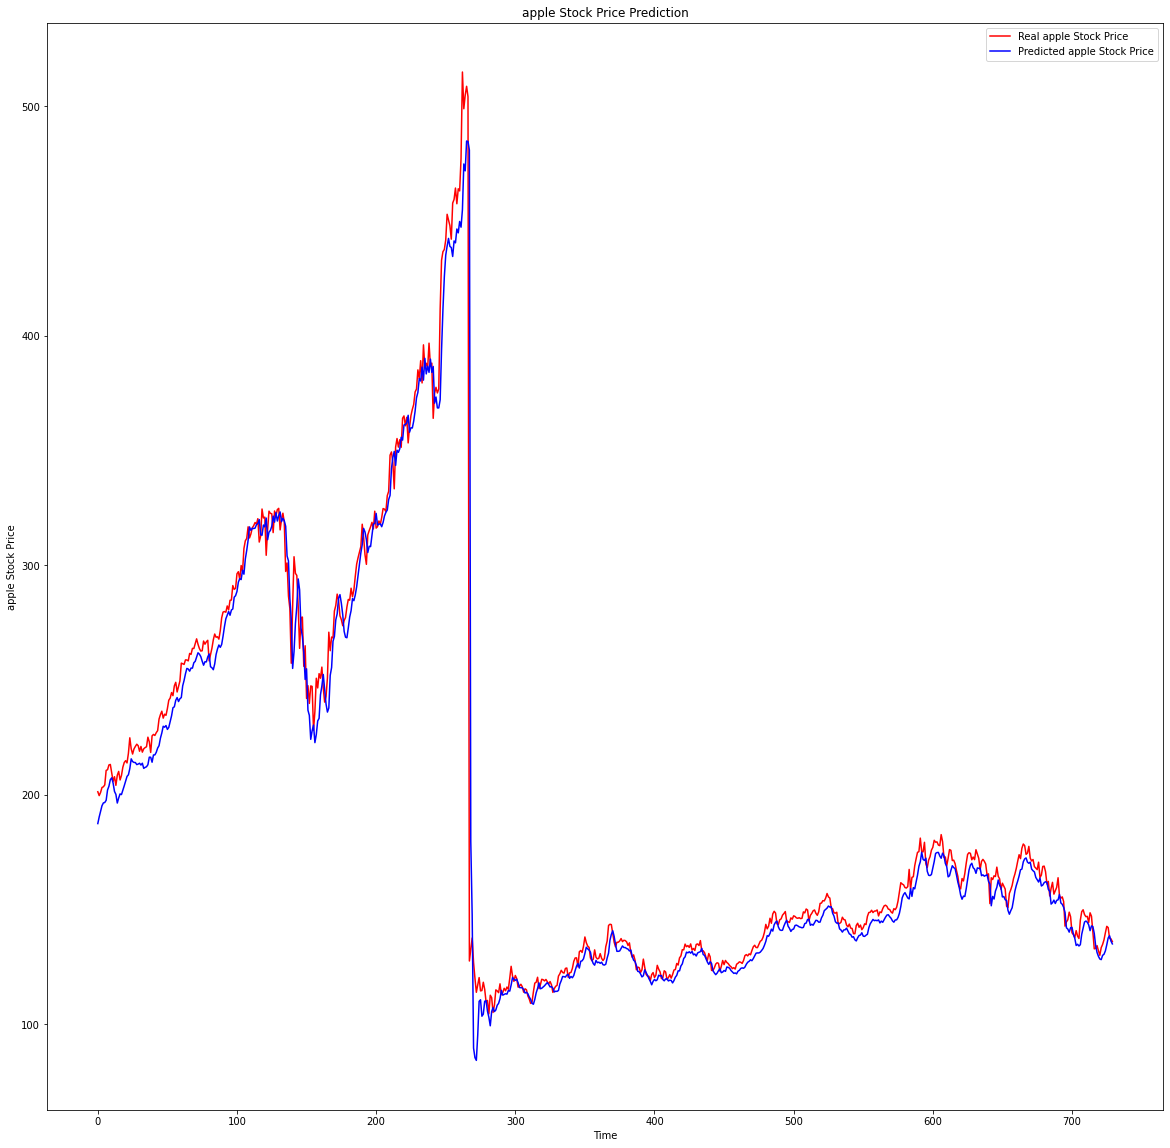

In [ ]:
plt.figure(figsize=(20,20))
plt.plot(real_stock_price, color = 'red', label = 'Real apple Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted apple Stock Price')
plt.title('apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('apple Stock Price')
plt.legend()
plt.show()

# Part 4: Optimal path

# Finding the optimal buy and sell days to obtain the most profit based on the predicted values

In [ ]:
def optimal(prices,n=30):
    '''Returns a list  of elements of [buy day, sell day] for maximum profit possible , Human count'''
    i =0
    profit = 0
    ans = list() #buy, sell day
    while i<(n-1):
        
        while (i < (n-2)) and prices[i]>prices[i+1]:
            i+=1
        buy = i
        i+=1
        
        while (i< (n-2)) and prices[i]<prices[i+1]:
            i+=1
        sell = i
        i+=1
        if buy == n-1: 
            return ans
        ans.append([buy+1,sell+1])
        profit+= prices[sell] - prices[buy]
    return ans


# Using predicted buy/sell days on actual prices

In [ ]:
def check(actual,predicted):
    p = optimal(predicted)
    tot=0
    for i in p:
        tot = actual[i[1]-1]- actual[i[0]-1]
    return tot

In [ ]:
print('Buy day\tSell day')
predicted=np.reshape(predicted_stock_price[:30],newshape=30)
for i in optimal(predicted):
    print(i[0],'\t',i[1])
print('Total profit earned over last 30 days while following the above path = $',check(actual=np.reshape(real_stock_price[:30],newshape=30),predicted=np.reshape(real_stock_price[:30],newshape=30)))

Buy day	Sell day
1 	 11
15 	 17
18 	 25
29 	 30
Total profit earned over last 30 days while following the above path = $ 4.280000000000001


In [ ]:
profit=0
for i in range(30,len(predicted_stock_price),30):
    profit+=check(actual=np.reshape(real_stock_price[i-30:i],newshape=30),predicted=np.reshape(real_stock_price[i-30:i],newshape=30))
print("Hence the total profit earned over 2 year is $",profit)

Hence the total profit earned over 2 year is $ 92.14499999999991
